**Value Iteration**

In this exercise, we are going to implement Value Iteration, an iterative method to obtain the optimal value function, in the next MDP:

![alt text](two_state_mdp.png "Title")

Let us start with the imports. We use only numpy and matplotlib in this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let us define the parameters of the problem. We have an MDP with two states, and two actions. The rewards, discount factor, and transition probabilities are given in the figure above. We also know the optimal policy beforehand from previous exercises:

In [2]:
gamma = 0.9
R = np.array([[-1, 0.6, 0.5, -0.9]]).T
P = np.array([[0.8, 0.2], [0.2, 0.8], [0.3, 0.7], [0.9, 0.1]])
pi_opt = np.array([[0, 1, 0, 0], [0, 0, 1, 0]])

First, we obtain the optimal value function $v^{\pi^* }$ and the optimal action-value function $q^{\pi^*}$ using the fixed-point Bellman equations, in order to assess the accuracy of our implementation:
* $v^{\pi} = \left( I - \gamma \mathcal{P}^{\pi} \right)^{-1} \mathcal{R}^{\pi}$
* $q^{\pi} = \left( I - \gamma \mathcal{P} \Pi \right)^{-1} \mathcal{R}$

In [3]:
v_opt = (np.linalg.inv(np.eye(pi_opt.shape[0]) - gamma * pi_opt @ P) @ pi_opt @ R).flatten()
q_opt = (np.linalg.inv(np.eye(P.shape[0]) - gamma * P @ pi_opt) @ R).flatten()
with np.printoptions(precision=2, suppress=True):
    print(f"Optimal Policy = {pi_opt.flatten()}")
    print(f"v^* = {v_opt}")
    print(f"q^* = {q_opt}")

Optimal Policy = [0 1 0 0 0 0 1 0]
v^* = [5.34 5.25]
q^* = [3.79 5.34 5.25 3.9 ]


Now, we are going to implement Value Iteration, an iterative method, for the state value function, following the algorithm seen in the slides:

In [4]:
n_states = 2
n_actions = 2

threshold = 1e-3  # Variation change for convergence check in VI
i=0  # VI iterations
delta = 1.0  # Initial difference value
v_vi = [np.zeros((n_states, 1))]  # Randomly initiate the value function
# First, obtain the optimal V function
while delta > threshold:
    delta = 0
    v_old = v_vi[-1]
    q = R + gamma * P @ v_vi[-1]  # Q-function, to check greedy actions
    q = q.reshape([n_states, n_actions])
    v_vi.append(np.amax(q, axis=1).reshape([n_states, 1]))
    delta = max(delta, np.amax(np.abs(v_vi[-1] - v_old)))
    i += 1

# Now, obtain the optimal policy
pi_vi = np.zeros((n_states, n_states * n_actions))
q = R + gamma * P @ v_vi[-1]  # Q-function, to obtain policy
q = q.reshape([n_states, n_actions])
for s in range(n_states):
    pi_vi[s, np.argmax(q[s]) + s * n_states] = 1

print('VI converged after ', i, ' iterations')

with np.printoptions(precision=2, suppress=True):  # Print the values obtained
    print(f"Policy optimal theory = {pi_opt.flatten()}")
    print(f"Policy optimal PI = {pi_vi.flatten()}")
    print(f"v^* theory = {v_opt}")
    print(f"v^* PI = {v_vi[-1].flatten()}")

VI converged after  61  iterations
Policy optimal theory = [0 1 0 0 0 0 1 0]
Policy optimal PI = [0. 1. 0. 0. 0. 0. 1. 0.]
v^* theory = [5.34 5.25]
v^* PI = [5.33 5.24]


We are also going to show the convergence of the state value function obtained with Value Iteration, where we see how the values converge to the actual ones that we obtained using the Bellman equations:

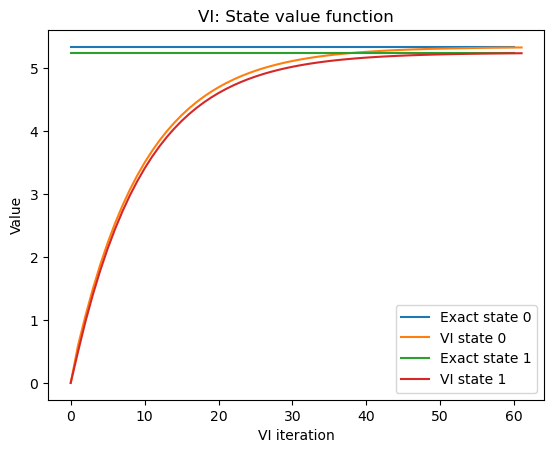

In [5]:
for s in range(n_states):
  plt.plot(v_opt[s] * np.ones((i,)), label='Exact state ' + str(s))
  plt.plot([v[s] for v in v_vi], label='VI state ' + str(s))
plt.legend(loc='best')
plt.xlabel('VI iteration')
plt.ylabel('Value')
plt.title('VI: State value function')
plt.show()

And we are going to repeat the procedure, but using Value Iteration on the state-action value function, following the algorithm seen in the slides:

In [6]:
n_states = 2
n_actions = 2

threshold = 1e-3  # Variation change for convergence check in VI
i=0  # VI iterations
delta = 1.0  # Initial difference value
q_vi = [np.zeros((n_states, n_actions))]  # Randomly initiate the value function
# First, obtain the optimal V function
while delta > threshold:
    delta = 0
    q_old = q_vi[-1]
    q_new = R + gamma * P @ (np.amax(q_old, axis=1).reshape([n_states, 1]))
    q_new = q_new.reshape([n_states, n_actions])
    q_vi.append(q_new)
    delta = max(delta, np.amax(np.abs(q_vi[-1] - q_old)))
    i += 1
# Now, obtain the optimal policy
pi_vi = np.zeros((n_states, n_states * n_actions))
for s in range(n_states):
    pi_vi[s, np.argmax(q_vi[-1][s]) + s * n_states] = 1

print('VI converged after ', i, ' iterations')

with np.printoptions(precision=2, suppress=True):  # Print the values obtained
    print(f"Policy optimal theory = {pi_opt.flatten()}")
    print(f"Policy optimal PI = {pi_vi.flatten()}")
    print(f"q^* theory = {q_opt}")
    print(f"q^* PI = {q_vi[-1].flatten()}")

VI converged after  61  iterations
Policy optimal theory = [0 1 0 0 0 0 1 0]
Policy optimal PI = [0. 1. 0. 0. 0. 0. 1. 0.]
q^* theory = [3.79 5.34 5.25 3.9 ]
q^* PI = [3.78 5.33 5.24 3.89]


We are also going to show the convergence of the state-action value function obtained with Value Iteration, where we see how the values converge to the actual ones that we obtained using the Bellman equations:

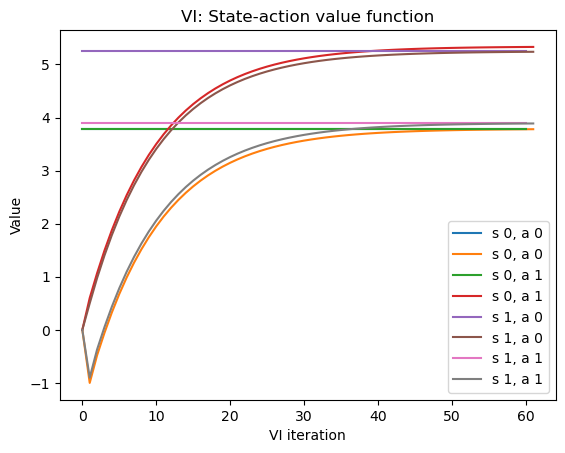

In [7]:
for s in range(n_states):
    for a in range(n_actions):
        plt.plot(q_opt[s * n_actions + s * a] * np.ones((i,)), label='s ' + str(s) + ', a ' + str(a))
        plt.plot([q[s,a] for q in q_vi], label='s ' + str(s) + ', a ' + str(a))
plt.legend(loc='best')
plt.xlabel('VI iteration')
plt.ylabel('Value')
plt.title('VI: State-action value function')
plt.show()